In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 8,6

Reading the combined file. Individual csv files were downloaded from LendingClub site - https://www.lendingclub.com/info/download-data.action .
The headers for these individual files can be removed before combining into a single file.

These individual files were combined using command prompt in Windows. 
How to combine csv using cmd- http://www.tomnash.eu/how-to-combine-multiple-csv-files-into-one-using-cmd/

In [3]:
loan_all = pd.read_csv("C:\\Users\\Madhava\\OneDrive\\Documents\\imarticus\\data.csv",low_memory=False)
loan_all.info()
loan_all.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985850 entries, 0 to 985849
Columns: 145 entries, id to settlement_term
dtypes: float64(56), int64(55), object(34)
memory usage: 1.1+ GB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,url,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,985850.000000,985850.000000,985850.000000,985850.000000,985850.000000,985850.000000,9.858500e+05,0.0,...,4122.0,4122.000000,4122.0,4122.000000,3301.000000,4122.000000,4122.000000,5188.000000,5188.000000,5188.000000
mean,NaN,NaN,14938.690952,14938.662550,14933.575503,42.488387,0.129686,446.190079,7.966692e+04,NaN,...,3.0,173.965842,3.0,11.045852,510.217725,13163.534272,190.549423,6224.270532,49.832951,15.358327
std,NaN,NaN,9428.934759,9428.935435,9426.730366,10.659373,0.051171,278.543968,1.483972e+05,NaN,...,0.0,135.091869,0.0,10.238793,392.896055,7803.055192,206.604582,4120.127752,7.426984,7.521819
min,NaN,NaN,1000.000000,1000.000000,775.000000,36.000000,0.050000,30.000000,0.000000e+00,NaN,...,3.0,5.380000,3.0,0.000000,18.180000,556.570000,0.010000,259.000000,0.650000,0.000000
25%,NaN,NaN,7800.000000,7800.000000,7800.000000,36.000000,0.090000,243.000000,4.700000e+04,NaN,...,3.0,72.212500,3.0,0.000000,215.520000,6974.910000,26.070000,3018.050000,45.000000,12.000000
50%,NaN,NaN,12000.000000,12000.000000,12000.000000,36.000000,0.130000,372.000000,6.600000e+04,NaN,...,3.0,137.050000,3.0,11.000000,407.820000,11614.910000,124.530000,5324.000000,48.225000,18.000000
75%,NaN,NaN,20000.000000,20000.000000,20000.000000,60.000000,0.160000,598.000000,9.500000e+04,NaN,...,3.0,238.272500,3.0,20.000000,694.230000,18125.165000,286.975000,8406.500000,55.000000,20.000000
max,NaN,NaN,40000.000000,40000.000000,40000.000000,60.000000,0.310000,1720.000000,1.100000e+08,NaN,...,3.0,893.050000,3.0,37.000000,2679.150000,40306.410000,1407.860000,27850.000000,95.050000,181.000000


In [ ]:
Pre-processing Data- It appears there are a lot of NaNs. 
Few cols with 100% NAs- id, member_id, url; zip_code info is masked. Also dropping cols with < 1/3 data.

In [4]:
loan_all.drop(['id', 'member_id', 'url', 'zip_code' ,'title' ], axis=1, inplace=True)

In [5]:
missingdata = [x for x in loan_all.count() < len(loan_all)*0.33]
loan_all.drop(loan_all.columns[missingdata], axis=1, inplace=True)
loan_all.shape
loan_all.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object', length=102)

Checking and dropping columns with just one unique value

In [6]:
unique = loan_all.nunique()
unique = unique[unique.values == 1]
loan_all.drop(labels = list(unique.index), axis =1, inplace=True)

Checking for outliers Data types for numeric columns

In [7]:
loan_all['annual_inc']= loan_all['annual_inc'].astype(float)
loan_all['annual_inc'].describe()
loan=loan_all.drop(loan_all[loan_all.annual_inc>1e+06].index)

Bucketing and dropping extra columns

In [8]:
loan['revol_util'].isnull().sum() #856 NAs
loan[loan['revol_util'].isnull()]['loan_status'].value_counts() #mostly current loans
loan.dropna(subset=['revol_util'],inplace=True)
loan['revol_util'].isna().sum()

0

In [9]:
loan['int_rate']=loan['int_rate'].astype(str)
loan['int_rate']= loan['int_rate'].map(lambda x: x.rstrip('%'))
loan['int_rate']= loan['int_rate'].astype(float)
loan['int_rate'].describe() # 5-30.9
buck = [0, 5, 10, 15, 20,25, 35]
lab = ['0-5', '5-10', '10-15', '15-20', '20-25','>25']
loan['int_rate_range'] = pd.cut(loan['int_rate'], buck, labels=lab)

In [10]:
loan['loan_amnt'].describe() #0-40k
buck = [0, 5000, 10000, 15000, 20000, 25000,40000]
lab = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], buck, labels=lab)

In [11]:
loan['annual_inc'].describe() #range 1 to 1 mill
buck = [0, 25000, 50000, 75000, 100000,1000000]
lab = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], buck, labels=lab)

Some basic plots to understand variable distribution- Univariate and bivariate relationships

C:\Users\Madhava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


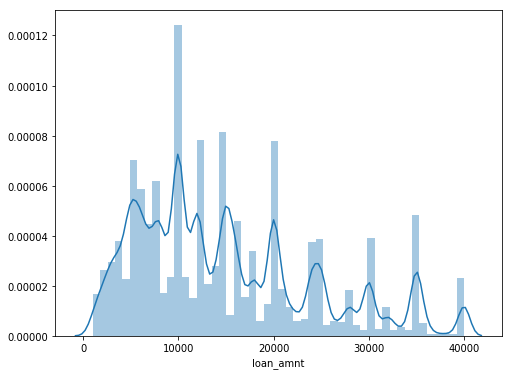

In [13]:
sns.distplot(loan['loan_amnt'])

C:\Users\Madhava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


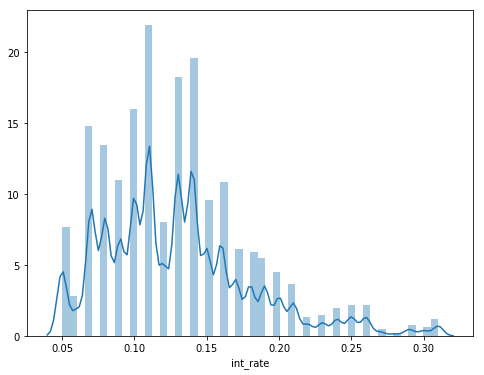

In [14]:
sns.distplot(loan['int_rate'])

C:\Users\Madhava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


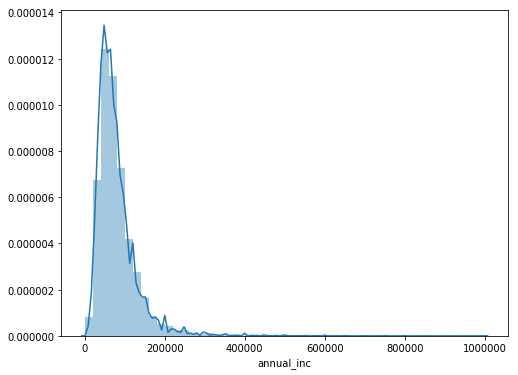

In [15]:
sns.distplot(loan['annual_inc'])

The classification label is the loan status column. Good loans are the ones that are fully paid and current status.  Bad loans are those classified as charged off,default, late, in grace period.
Issued loans do not have any information yet so can delete from data.

Current               703989
Fully Paid            182459
Charged Off            52937
Issued                 18959
Late (31-120 days)     15118
In Grace Period         6577
Late (16-30 days)       4421
Default                  283
Name: loan_status, dtype: int64

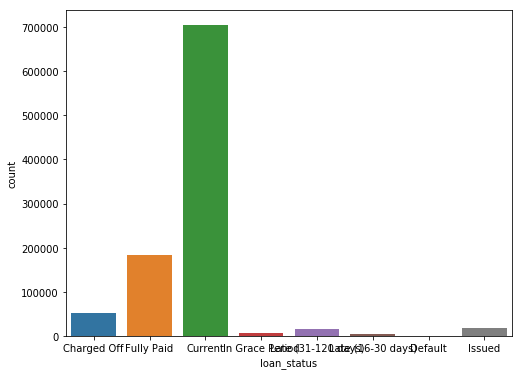

In [16]:
sns.countplot(loan['loan_status'])
loan['loan_status'].value_counts()

In [17]:
loan['loan_status'].value_counts()/len(loan)
loan.drop(loan[loan.loan_status== 'Issued'].index, inplace=True)
loan['good_loan'] = np.where((loan.loan_status == 'Fully Paid') |
                        (loan.loan_status == 'Current'), 1, 0)
loan['good_loan'].value_counts()/len(loan)

1    0.917853
0    0.082147
Name: good_loan, dtype: float64

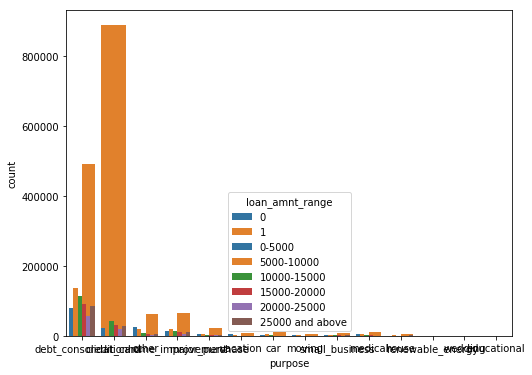

In [18]:
sns.countplot(loan['good_loan'])
sns.countplot(loan['purpose'],hue=loan['good_loan'])
sns.countplot(loan['purpose'],hue=loan['loan_amnt_range'])

Home ownership variable- any and none levels do not signify anything so can be dropped

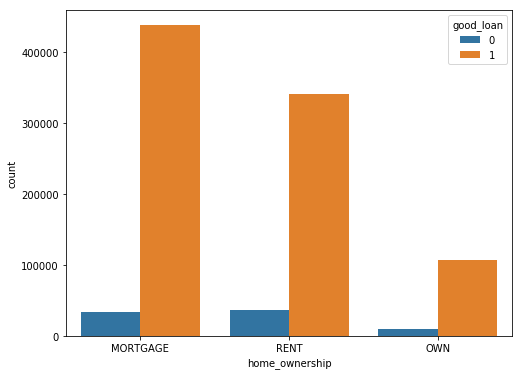

In [19]:
loan.drop(loan[loan['home_ownership']== 'ANY'].index, inplace=True)
loan.drop(loan[loan['home_ownership']== 'NONE'].index, inplace=True)
sns.countplot(loan['home_ownership'],hue=loan['good_loan']) 

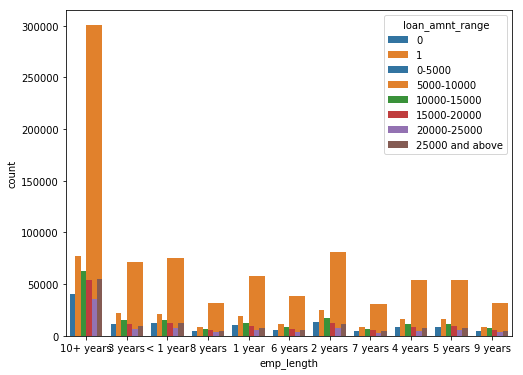

In [20]:
#employment length
sns.countplot(loan['emp_length'],hue=loan['good_loan'])
sns.countplot(loan['emp_length'],hue=loan['loan_amnt_range'])

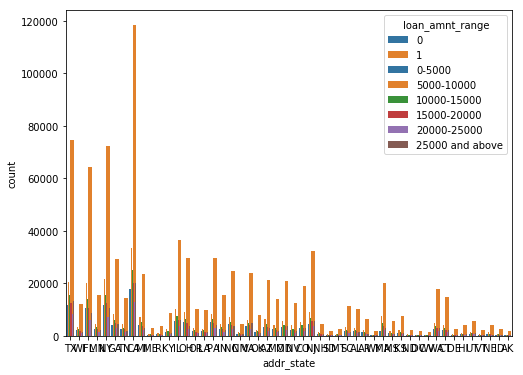

In [21]:
#geography
sns.countplot(loan['addr_state'],hue=loan['good_loan']) 
sns.countplot(loan['addr_state'],hue=loan['loan_amnt_range']) 

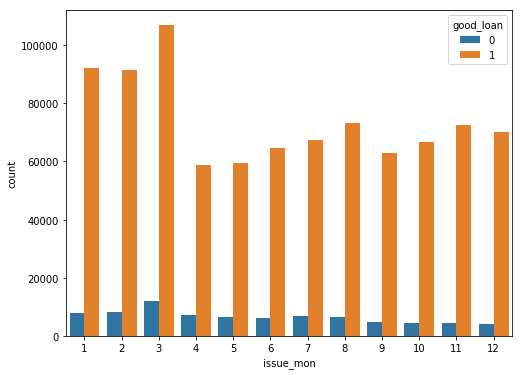

In [22]:
#monthly trend
loan['issue_yr']=pd.DatetimeIndex(loan['issue_d']).year
loan['issue_mon']=pd.DatetimeIndex(loan['issue_d']).month
sns.countplot(loan['issue_mon'],hue=loan['good_loan'])

Checking correlation between a few key business variables

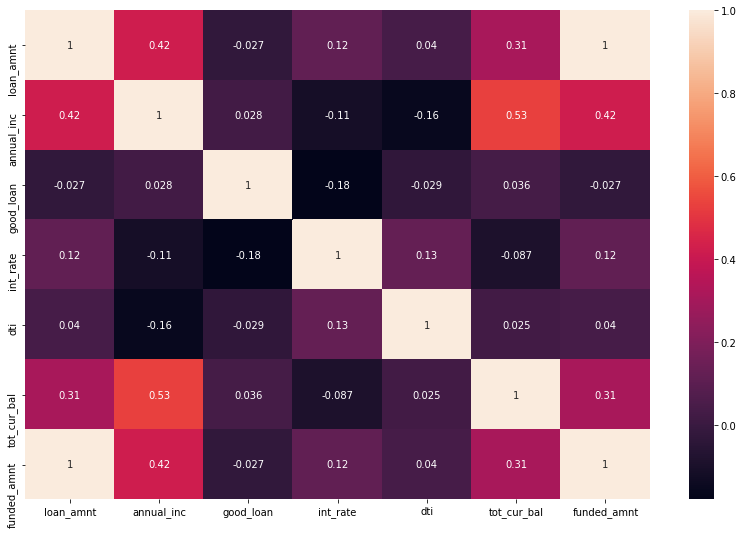

In [23]:
cor_loan=loan[['loan_amnt','annual_inc', 'good_loan', 'int_rate', 'dti', 
               'tot_cur_bal', 'funded_amnt']]
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(cor_loan.corr(), 
            xticklabels=cor_loan.columns.values,
            yticklabels=cor_loan.columns.values,annot= True)
plt.show()

Variable selection: Dropping retrospective variables that would not have been known at the time of loan issuance and thus can skew the prediction.

In [24]:
loan.drop(['funded_amnt', 'funded_amnt_inv', 'total_pymnt', 
'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 
'recoveries', 'collection_recovery_fee'], axis=1, inplace=True)

In [ ]:
For categorical variables- Hot encoding used wherever clear levels could not be established
'earliest_cr_line', 'emp_length'

In [25]:
loan['emp_length'].value_counts()
emp_range= {'< 1 year':0.5, '1 year':1, '2 years': 2, '3 years':3,
            '4 years':4, '5 years':5,'6 years':6,'7 years':7,
            '8 years':8,'9 years':9, '10+ years':10}
loan['emplen'] = loan["emp_length"].map(emp_range)
loan['emplen'].isnull().sum() 
loan['emplen'].value_counts() 

10.0    324839
2.0      88290
0.5      81672
3.0      77594
1.0      63944
5.0      58697
4.0      58407
6.0      41476
9.0      34700
8.0      34573
7.0      33372
Name: emplen, dtype: int64

Missing value imputation

In [26]:
nullseries=pd.isnull(loan).sum()
nullseries[nullseries>0]

loan['emplen'] = loan['emplen'].replace(np.nan, 10)
loan.drop(['emp_length'],axis=1,inplace=True)

loan['mths_since_last_delinq'] = loan['mths_since_last_delinq'].fillna(loan['mths_since_last_delinq'].median()) #mean and median v similar
loan['mths_since_recent_revol_delinq']=loan['mths_since_recent_revol_delinq'].fillna(loan['mths_since_recent_revol_delinq'].median())

#very few missing values for all of them
loan['dti'] = loan['dti'].fillna(loan['dti'].mean())
loan['inq_last_6mths'] = loan['inq_last_6mths'].fillna(loan['inq_last_6mths'].mean())
loan['open_acc_6m'] = loan['open_acc_6m'].fillna(loan['open_acc_6m'].median())
loan['open_act_il'] = loan['open_act_il'].fillna(loan['open_act_il'].median())
loan['open_il_12m'] = loan['open_il_12m'].fillna(loan['open_il_12m'].median())
loan['open_il_24m'] = loan['open_il_24m'].fillna(loan['open_il_24m'].median())
loan['open_rv_12m'] = loan['open_rv_12m'].fillna(loan['open_rv_12m'].median())
loan['open_rv_24m'] = loan['open_rv_24m'].fillna(loan['open_rv_24m'].median())
loan['max_bal_bc'] = loan['max_bal_bc'].fillna(loan['max_bal_bc'].median())
loan['all_util'] = loan['all_util'].fillna(loan['all_util'].median())
loan['inq_fi'] = loan['inq_fi'].fillna(loan['inq_fi'].median())
loan['total_cu_tl'] = loan['total_cu_tl'].fillna(loan['total_cu_tl'].median())
loan['total_bal_il']=loan['total_bal_il'].fillna(loan['total_bal_il'].mean())
loan['inq_last_12m'] = loan['inq_last_12m'].fillna(loan['inq_last_12m'].median())

#A lot of NAs- with integer values so median replacement
loan['mths_since_rcnt_il']=loan['mths_since_rcnt_il'].fillna(loan['mths_since_rcnt_il'].median())
loan['il_util']=loan['il_util'].fillna(loan['il_util'].median())

loan['bc_open_to_buy'].value_counts() # 0s occur the most
loan['bc_open_to_buy']=loan['bc_open_to_buy'].fillna(0)

# bc_util= total current balance/credit limit
loan[loan['bc_util'].isnull()]['bc_open_to_buy'].value_counts() #mostly 0s
loan[loan['bc_open_to_buy']==0]['bc_util'].value_counts() #bcutil is~100
loan['bc_util']=loan['bc_util'].fillna(100)
loan['mo_sin_old_il_acct']=loan['il_util'].fillna(loan['il_util'].median()) #mostly around 120-130
loan['mths_since_recent_bc']=loan['mths_since_recent_bc'].fillna(loan['mths_since_recent_bc'].median()) #no corr found
loan['mths_since_recent_inq']=loan['mths_since_recent_inq'].fillna(loan['mths_since_recent_inq'].median()) #no corr found
loan['num_tl_120dpd_2m']=loan['num_tl_120dpd_2m'].fillna(0) #0 common

Feature Engineering- Credit Length and for other categorical variables, introduced levels/encoding where not ordinality could not be established. Variables such as- verification status,subgrade, purpose,addr_state.
Hot encoding needs to be done for purpose.


In [27]:
loan['earliest_crline_yr']=pd.DatetimeIndex(loan['earliest_cr_line']).year

In [28]:
loan['issue_yr'].apply(int)
loan.loc[loan['issue_yr'].apply(pd.to_numeric, args=('coerce',))> 18, 'issue_yr'] = '19' + loan['issue_yr'].astype(str)
loan.loc[loan['issue_yr'].apply(pd.to_numeric, args=('coerce',))< 19, 'issue_yr'] = '20' + loan['issue_yr'].astype(str)
loan['issue_yr'].apply(int)
loan.drop(['issue_d', 'issue_mon'], axis=1, inplace=True)

#now to introduce new variable for checking the difference of these 2 and drop them
loan['credit_len']=loan['issue_yr'].apply(int)-loan['earliest_crline_yr'].apply(int)
loan.drop(['issue_yr', 'earliest_crline_yr'],axis=1, inplace=True)


In [29]:
verification_map={'Source Verified':3, 'Verified':2, 'Not Verified':1}
loan['verification_status']=loan['verification_status'].map(verification_map)

ownership_map={'MORTGAGE':1, 'RENT':2, 'OWN':3}
loan['home_ownership']=loan['home_ownership'].map(ownership_map)

subgrade_map={'A1':1,'A2':2, 'A3':3, 'A4':4, 'A5':5, 'B1':6, 'B2':7, 'B3':8, 'B4':9, 'B5':10, 
              'C1':11, 'C2':12, 'C3':13, 'C4':14, 'C5':15, 'D1':16, 'D2':17, 'D3':18, 
              'D4':19, 'D5':20, 'E1':21, 'E2':22, 'E3':23, 'E4':24, 'E5':25, 'F1':26, 
              'F2':27, 'F3':28, 'F4':29, 'F5':30, 'G1':31, 'G2':32, 'G3':33, 'G4':34, 'G5':35}
loan['sub_grade']=loan['sub_grade'].map(subgrade_map)
loan.drop(['grade'],axis=1, inplace=True)

hardship_map={'N':0, 'Y':1}
loan['hardship_flag']=loan['hardship_flag'].map(hardship_map)

debtsett_map={'N':0, 'Y':1}
loan['debt_settlement_flag']=loan['debt_settlement_flag'].map(debtsett_map)

In [30]:
loan= loan[loan['purpose'] != 'educational']
loan= loan[loan['purpose'] !='wedding']
loan= loan[loan['purpose'] !='other']

loan['loan_amnt'].isna().sum()
loan.shape

(895988, 93)

In [31]:
enc1= pd.get_dummies(loan['purpose'])
loan=pd.concat((loan,enc1), axis=1)
loan.drop(['purpose'],axis=1,inplace=True)

enc2= pd.get_dummies(loan['addr_state'])
loan=pd.concat((loan,enc2), axis=1)
loan.drop(['addr_state'],axis=1,inplace=True)

enc3= pd.get_dummies(loan['disbursement_method'])
loan=pd.concat((loan,enc3), axis=1)
loan.drop(['disbursement_method'],axis=1,inplace=True)

enc4= pd.get_dummies(loan['application_type'])
loan=pd.concat((loan,enc4), axis=1)
loan.drop(['application_type'],axis=1,inplace=True)


In [32]:
loan.drop(['earliest_cr_line','loan_amnt_range', 'annual_inc_range',
           'int_rate_range','loan_status', 'next_pymnt_d','emp_title'
           ,'pymnt_plan','initial_list_status', 'total_rec_late_fee'],axis=1, inplace=True)
loan.isna()
loan.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
open_acc_6m                   0
open_act_il                   0
open_il_12m                   0
open_il_24m                   0
mths_since_rcnt_il            0
total_bal_il                  0
il_util                       0
                             ..
MS      

Sampling procedures- 
SMOTE: can increase recall at the cost of precision
Undersampling: if less data overall, minority class gets you less data
ADASYN will focus on samples which are difficult to classify with NN

Split original data-oversample training set-test on original test data
http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/under-sampling/plot_random_under_sampler.html#sphx-glr-auto-examples-under-sampling-plot-random-under-sampler-py


In [33]:

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold


In [34]:
X= loan[loan.columns.difference(['good_loan'])] #except label
y= loan['good_loan']


In [35]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE 
from imblearn.under_sampling import RandomUnderSampler


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0, stratify=y)

#OVERSAMPLING-ADASYN
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_sample(X_train, y_train)
Counter(y_res) #data exploded to 1mn records with 145 variables

#OVERSAMPLING-SMOTE
sm= SMOTE(random_state=42)
X_sm, y_sm = sm.fit_sample(X_train, y_train)
#Counter(y_res) #data exploded to 1mn records with 145 variables

#OVERSAMPLING-RANDOM
ros= RandomOverSampler(random_state=555)
X_over, y_over= ros.fit_sample(X_train, y_train)

#Undersampling
rus = RandomUnderSampler(return_indices=True, random_state=555)
X_resampled, y_resampled, idx_resampled= rus.fit_sample(X_train, y_train)


Standardization of Data

In [37]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std= scaler.fit_transform(X_sm)
X_std_test= scaler.fit_transform(X_test)


Testing out which sampling gives best results- SMOTE, ADASYN, Random Oversampling, Random Undersampling. 
It was observed that SMOTE gave the best results in this case and that sampling was chosen. 

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score,classification_report

In [40]:
#1. Logistic Regression

#SMOTE
lr_sm = LogisticRegression() 
lr_sm.fit(X_sm, y_sm)
lr_sm.score(X_sm, y_sm)
y_pred_sm= lr_sm.predict(X_test)
accuracy_score(y_test, y_pred_sm)
roc_auc_score(y_test, y_pred_sm)
classification_report(y_test, y_pred_sm)
f1_score(y_test, y_pred_sm)

lr_sm.coef_.shape

(1, 143)

In [ ]:

#ADASYN
model = LogisticRegression() 
model.fit(X_res, y_res)
model.score(X_res, y_res)
y_pred= model.predict(X_test)
accuracy_score(y_test, y_pred)
roc_auc_score(y_test, y_pred)
classification_report(y_test, y_pred)


In [ ]:

#oversample- random
model_over = LogisticRegression()
model_over.fit(X_over, y_over) 
model_over.score(X_over, y_over)
y_pred_over= model_over.predict(X_test) 
accuracy_score(y_test, y_pred_over)
roc_auc_score(y_test, y_pred_over)
classification_report(y_test, y_pred_over)


In [ ]:
#undersample
model_under = LogisticRegression()
model_under.fit(X_resampled, y_resampled) 
model_under.score(X_resampled, y_resampled)
y_pred_under= model_under.predict(X_test) 
accuracy_score(y_test, y_pred_under)
roc_auc_score(y_test, y_pred_under)
classification_report(y_test, y_pred_under)

Training and Testing Decision Trees

In [41]:
#2 Decision Tree
from sklearn.tree import tree, DecisionTreeClassifier
dt = tree.DecisionTreeClassifier(criterion='gini')
dt.fit(X_sm, y_sm)
dt.score(X_sm, y_sm)
y_pred_sm= dt.predict(X_test)
accuracy_score(y_test, y_pred_sm)
roc_auc_score(y_test, y_pred_sm)
classification_report(y_test, y_pred_sm)
f1_score(y_test, y_pred_sm)    

0.9275932186780342

In [ ]:

#visualization
from os import system
dotfile = open("C:/Users/Madhava/OneDrive/Documents/UC-BANA/Summer 2018/Capstone:/dtree2.dot", 'w')
tree.export_graphviz(dt, out_file = dotfile, feature_names = X_sm.columns)
dotfile.close()
system("dot -Tpng D:.dot -o D:/dtree2.png")

with open("dt.txt", "w") as f:
    f = tree.export_graphviz(dt, out_file=f)

Traiing, testing and tuning Random Forests

In [42]:
#3 Random Forests
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=80, max_features= 'log2')
rf.fit(X_sm, y_sm)
#rf.score(X_sm, y_sm)
y_rf= rf.predict(X_test)
accuracy_score(y_test, y_rf)
roc_auc_score(y_test, y_rf)
classification_report(y_test, y_rf)
f1_score(y_test, y_rf)    

0.9591028520263625

In [ ]:
#tuning RF
from sklearn.grid_search import GridSearchCV
param_grid = { 
    'n_estimators': [20, 80],
    'max_features': [None, 'log2', 'sqrt']
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_sm, y_sm)
print (CV_rf.best_params)

In [43]:

#variable importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


Feature ranking:
1. feature 119 (0.056414)
2. feature 118 (0.047634)
3. feature 142 (0.044134)
4. feature 128 (0.039670)
5. feature 79 (0.036693)
6. feature 81 (0.033858)
7. feature 66 (0.029947)
8. feature 77 (0.029449)
9. feature 78 (0.028685)
10. feature 112 (0.026727)
11. feature 110 (0.026627)
12. feature 64 (0.026142)
13. feature 116 (0.023071)
14. feature 130 (0.021202)
15. feature 121 (0.019818)
16. feature 138 (0.018281)
17. feature 67 (0.018225)
18. feature 114 (0.017600)
19. feature 71 (0.015566)
20. feature 89 (0.015473)
21. feature 55 (0.014827)
22. feature 122 (0.013533)
23. feature 68 (0.013183)
24. feature 88 (0.013065)
25. feature 117 (0.013054)
26. feature 74 (0.012142)
27. feature 95 (0.011942)
28. feature 115 (0.011377)
29. feature 98 (0.010892)
30. feature 97 (0.010799)
31. feature 4 (0.009456)
32. feature 99 (0.009439)
33. feature 93 (0.009101)
34. feature 92 (0.008610)
35. feature 123 (0.008237)
36. feature 94 (0.007716)
37. feature 105 (0.007693)
38. feature 80 

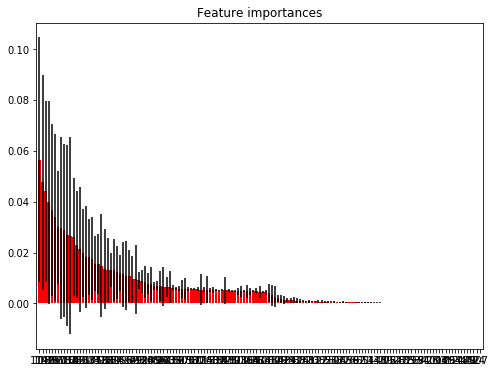

In [44]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


Gradient Boosted Trees

In [45]:
from sklearn.ensemble import GradientBoostingClassifier  
gb = GradientBoostingClassifier(n_estimators=80, learning_rate=1, 
                                random_state=42)
gb.fit(X_sm, y_sm)
#rf.score(X_sm, y_sm)
y_gb= gb.predict(X_test)
#accuracy_score(y_test, y_rf)
roc_auc_score(y_test, y_gb)
classification_report(y_test, y_gb)
f1_score(y_test, y_gb) 


0.960281335638592

Support Vector Machines

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

model_svm = svm.SVC(random_state=42, tol=100,class_weight='balanced')
model_svm.fit(X_std, y_sm)
y_svm= model_svm.predict(X_std_test)
accuracy_score(y_test, y_svm)
roc_auc_score(y_test, y_svm)
classification_report(y_test, y_svm)
f1_score(y_test, y_svm)


For Neural Networks and Deep Learning- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(777)


In [ ]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=143, activation='relu'))
model.add(Dense(143, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_std, y_sm, epochs=50, batch_size=10)
# evaluate the model
scores = model.evaluate(X_std, y_sm)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions = model.predict(X_std_test)
y_rounded = [round(x[0]) for x in predictions]
scores_test = model.evaluate(X_std_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

accuracy_score(y_test, y_rounded)
f1_score(y_test, y_rounded)
roc_auc_score(y_test, y_rounded)